In [7]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
from tensorflow.keras.utils import to_categorical
from glob import glob

In [8]:
!pip install kaggle

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [10]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia



chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
from zipfile import ZipFile
dataset = '/content/chest-xray-pneumonia.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [13]:
normal = os.listdir('/content/chest_xray/train/NORMAL')
print(normal[0:5])
print(normal[-5:])

['NORMAL2-IM-1279-0001.jpeg', 'IM-0288-0001.jpeg', 'IM-0375-0001.jpeg', 'NORMAL2-IM-1406-0001.jpeg', 'IM-0520-0001.jpeg']
['IM-0302-0001.jpeg', 'NORMAL2-IM-0699-0001.jpeg', 'NORMAL2-IM-1179-0001.jpeg', 'NORMAL2-IM-0994-0001.jpeg', 'NORMAL2-IM-0460-0001.jpeg']


In [14]:
pneu = os.listdir('/content/chest_xray/train/PNEUMONIA')
print(pneu[0:5])
print(pneu[-5:])

['person525_bacteria_2216.jpeg', 'person1518_virus_2645.jpeg', 'person548_virus_1088.jpeg', 'person790_virus_1421.jpeg', 'person30_bacteria_150.jpeg']
['person348_bacteria_1603.jpeg', 'person738_virus_1360.jpeg', 'person1197_virus_2039.jpeg', 'person1080_virus_1791.jpeg', 'person413_virus_844.jpeg']


In [15]:
print(len(normal))
print(len(pneu))

1341
3875


In [16]:
normal_lables=[1]*1341
pneu_lables=[0]*3875

In [17]:
print(normal_lables)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [18]:
print(pneu_lables[:5])

[0, 0, 0, 0, 0]


In [19]:
labels=normal_lables+pneu_lables

In [20]:
# convert images to numpy arrays+

normal_path = '/content/chest_xray/train/NORMAL/'

data = []

for img_file in normal:

  image = Image.open(normal_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



pneu_path = '/content/chest_xray/train/PNEUMONIA/'


for img_file in pneu:

  image = Image.open(pneu_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [21]:

X = np.array(data)
Y = np.array(labels)

In [22]:
print(X.shape)
print(Y.shape)

(5216, 128, 128, 3)
(5216,)


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(5216, 128, 128, 3) (4172, 128, 128, 3) (1044, 128, 128, 3)


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [26]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

In [27]:
datagen.fit(X_train)

In [28]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255


In [29]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow as tf
from tensorflow.keras.models import Sequential  # Import Sequential from keras.models
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout  # Import Conv2D from keras.layers



In [30]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

# model = models.Sequential()

# # Convolutional Layer 1
# model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# # Convolutional Layer 2
# model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# # Flatten the feature maps
# model.add(layers.Flatten())

# # Fully Connected Layer 1
# model.add(layers.Dense(128, activation='relu'))

# # Output Layer
# model.add(layers.Dense(num_of_classes, activation='sigmoid'))

# Define the model
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='sigmoid'))  # Use 1 neuron for binary classification



In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# model.compile(optimizer='adam',
#               loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
#               metrics=['accuracy'])


In [36]:
print(len(X_train_scaled))
print(len(Y_train))

4172
4172


In [37]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

# batch_size = 32
# epochs = 10
# history = model.fit(datagen.flow(X_train_scaled, Y_train, batch_size=batch_size),
#                     validation_data=(X_test_scaled, Y_test),
#                     epochs=epochs)

Epoch 1/5
118/118 [==============================] - 20s 37ms/step - loss: 0.4529 - acc: 0.7973 - val_loss: 0.1827 - val_acc: 0.9282
Epoch 2/5
118/118 [==============================] - 3s 22ms/step - loss: 0.2148 - acc: 0.9315 - val_loss: 0.1724 - val_acc: 0.9330
Epoch 3/5
118/118 [==============================] - 2s 19ms/step - loss: 0.1656 - acc: 0.9441 - val_loss: 0.1359 - val_acc: 0.9354
Epoch 4/5
118/118 [==============================] - 2s 18ms/step - loss: 0.1531 - acc: 0.9489 - val_loss: 0.1417 - val_acc: 0.9450
Epoch 5/5
118/118 [==============================] - 2s 18ms/step - loss: 0.1381 - acc: 0.9587 - val_loss: 0.1225 - val_acc: 0.9545


In [38]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

33/33 [==============================] - 0s 10ms/step - loss: 0.0957 - acc: 0.9636
Test Accuracy = 0.9636015295982361


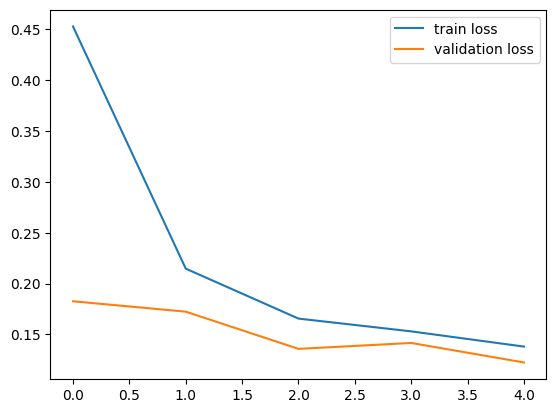

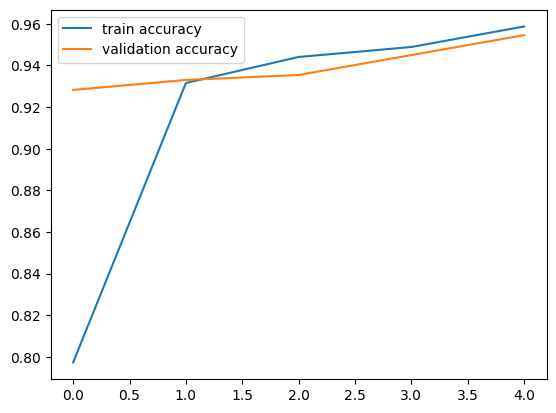

In [40]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()